# Структура

В колабе рисуется слева на основе заголовков в markdown ячеек :) Можно не дублировать тут


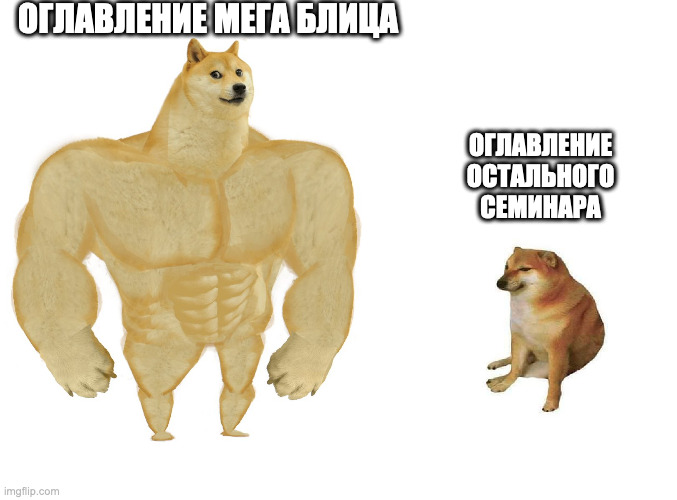

# Recap Регуляризация

In [85]:
import torch
import torch.nn as nn
import torch.optim as optim

## Dropout

[Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)

In [86]:
do = nn.Dropout(p=0.5)
do.train()
print(do.training)

do

True


Dropout(p=0.5, inplace=False)

In [87]:
t = torch.arange(0, 15, dtype=torch.float32).reshape(3, 5)
t

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.]])

In [88]:
# Sequential( Lin(), DO() ) #  пример использования
я

In [89]:
do(t)

tensor([[ 0.,  0.,  0.,  6.,  0.],
        [ 0., 12.,  0.,  0., 18.],
        [ 0.,  0., 24., 26., 28.]])

In [90]:
do.eval()
print(do.training)

False


In [91]:
do(t)

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.]])

## BatchNorm2d

[BatchNorm2d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html)

In [92]:
affine_bn = nn.BatchNorm2d(3, affine=True )
affine_bn.eval()
affine_bn.train()

affine_bn

BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [93]:
affine_bn.train()
affine_bn.training

True

In [94]:
affine_bn.eval()
affine_bn.training

False

In [95]:
list(affine_bn.parameters())

[Parameter containing:
 tensor([1., 1., 1.], requires_grad=True), Parameter containing:
 tensor([0., 0., 0.], requires_grad=True)]

In [96]:
not_affine_bn = nn.BatchNorm2d(3, affine=False )
not_affine_bn

BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)

In [97]:
list(not_affine_bn.parameters())

[]

Что происходит под капотом?

In [ ]:
# очень грубо!
# важно, что средние значения и ско считаются для каждого слоя отдельно
# в этом примере это не так
def forward(self, data: torch.Tensor):
    data = (data - data.mean()) / data.var()
    # data = data * self.afinne_std + self.afinne_mean
    return data

In [19]:
t = torch.arange(0, 45, dtype=torch.float32).view(1, 3, 3, 5)
t.shape

torch.Size([1, 3, 3, 5])

In [20]:
t_bn = not_affine_bn(t)
t_bn.shape

torch.Size([1, 3, 3, 5])

In [21]:
t_bn

tensor([[[[-1.6202e+00, -1.3887e+00, -1.1573e+00, -9.2582e-01, -6.9436e-01],
          [-4.6291e-01, -2.3145e-01,  0.0000e+00,  2.3145e-01,  4.6291e-01],
          [ 6.9436e-01,  9.2582e-01,  1.1573e+00,  1.3887e+00,  1.6202e+00]],

         [[-1.6202e+00, -1.3887e+00, -1.1573e+00, -9.2582e-01, -6.9437e-01],
          [-4.6291e-01, -2.3146e-01, -2.3842e-07,  2.3145e-01,  4.6291e-01],
          [ 6.9436e-01,  9.2582e-01,  1.1573e+00,  1.3887e+00,  1.6202e+00]],

         [[-1.6202e+00, -1.3887e+00, -1.1573e+00, -9.2582e-01, -6.9437e-01],
          [-4.6291e-01, -2.3146e-01, -3.5763e-07,  2.3145e-01,  4.6291e-01],
          [ 6.9436e-01,  9.2582e-01,  1.1573e+00,  1.3887e+00,  1.6202e+00]]]])

In [22]:
(t - t.mean()) / t.std()

tensor([[[[-1.6751, -1.5989, -1.5228, -1.4466, -1.3705],
          [-1.2944, -1.2182, -1.1421, -1.0659, -0.9898],
          [-0.9137, -0.8375, -0.7614, -0.6852, -0.6091]],

         [[-0.5330, -0.4568, -0.3807, -0.3046, -0.2284],
          [-0.1523, -0.0761,  0.0000,  0.0761,  0.1523],
          [ 0.2284,  0.3046,  0.3807,  0.4568,  0.5330]],

         [[ 0.6091,  0.6852,  0.7614,  0.8375,  0.9137],
          [ 0.9898,  1.0659,  1.1421,  1.2182,  1.2944],
          [ 1.3705,  1.4466,  1.5228,  1.5989,  1.6751]]]])

In [25]:
# еще есть параметр track_running_stats, про него можно подробнее посмотреть в домашке
bn_track_running_stats = nn.BatchNorm2d(3, affine=True, track_running_stats=True)

# means by channel, vars by channel, count steps
list(bn_track_running_stats.buffers())

[tensor([0., 0., 0.]), tensor([1., 1., 1.]), tensor(0)]

# Картинки


**Вопрос**: Что хранится в значении пикселя? (число от 0 до 255)

**Вопрос**: Что если все цвета 255?

**Вопрос**: Что если все цвета 0?

**Вопрос**: Что если `red = 255`, а `green = blue = 0`?

**Вопрос**: Что если все каналы равны друг другу?

In [26]:
[ 1, 64, 64 ] # черно-белая

[ 3, 64, 64 ] # цветная картинка

[3, 64, 64]

In [98]:
!wget https://i.imgflip.com/62ixgw.jpg

--2023-02-06 16:56:36--  https://i.imgflip.com/62ixgw.jpg
Resolving i.imgflip.com (i.imgflip.com)... 104.18.64.15, 104.18.255.14
Connecting to i.imgflip.com (i.imgflip.com)|104.18.64.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69445 (68K) [image/jpeg]
Saving to: ‘62ixgw.jpg.1’

62ixgw.jpg.1        100%[===================>]  67.82K  --.-KB/s    in 0.01s   

2023-02-06 16:56:36 (5.65 MB/s) - ‘62ixgw.jpg.1’ saved [69445/69445]



У изображений обычно 3 канала. Мы будем работать с RGB-каналами. 

---

Значение каждого пикселя [0..255] -- это его яркость

In [102]:
import cv2
import matplotlib.pyplot as plt

img_bgr = cv2.imread("./62ixgw.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgb.shape

(433, 577, 3)

In [100]:
img_rgb[:3, :3, :]

array([[[155, 181, 204],
        [157, 183, 206],
        [160, 186, 209]],

       [[145, 171, 194],
        [151, 177, 200],
        [158, 184, 207]],

       [[136, 162, 185],
        [140, 166, 189],
        [145, 171, 194]]], dtype=uint8)

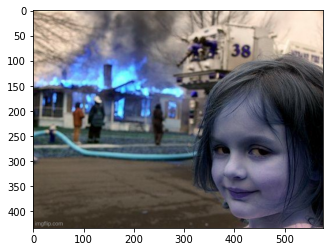

In [101]:
plt.imshow(img_bgr)

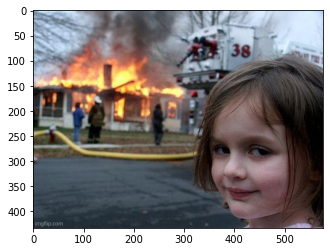

In [31]:
plt.imshow(img_rgb)

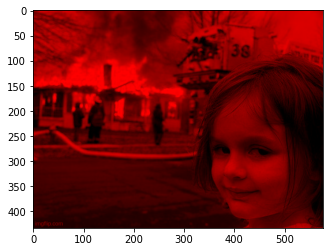

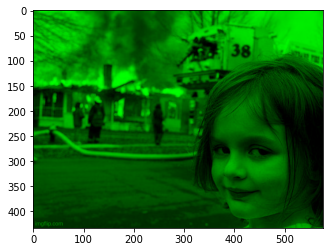

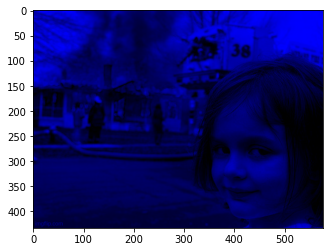

In [103]:
for i in range(3):
    plt.figure(i)
    img_copy = img_rgb.copy()
    img_copy[:, :, (i + 1) % 3] = 0
    img_copy[:, :, (i + 2) % 3] = 0
    plt.imshow(img_copy)

# Свертки

Дока [pytorch Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)

* **kernel_size** --- размер ядра свертки (так ядро иногда называют фильтром). На гифке размер ядра 3 на 3. Можно сделать несимметричную свертку (например, 1 на 10), но на практике используют симметричные
* **padding** --- отступ, ширина "рамочки", котрая будет дорисовываться вокруг нашего изображения
* **stride** --- размер шага ядра


**Важно**: ядро -- это серый квадратик (3x3), который бегает по синему  квадратику. Зеленый квадратик -- это результат работы свертки.




<img src="https://cdn-images-1.medium.com/max/1600/0*1PSMTM8Brk0hsJuF." width=450 height=400>

Забегая вперед, это визуализация тут `nn.Conv2d(1, 1, kernel_size=3, stride=2, padding=1)`

Результаты свертки каждого скользящего окна складываются


# Как свертки работают для цветного изображения?

Го в гифку https://cs231n.github.io/convolutional-networks/

> The visualization below iterates over the output activations (green), and shows that each element is computed by elementwise multiplying the highlighted input (blue) with the filter (red), summing it up, and then offsetting the result by the bias

## Попробуем применить свертку к изображению

A)
```
[0, 0, 0],
[0, 1, 0],
[0, 0, 0]
```
Б)
```
[0, 1, 0],
[0, -2, 0],
[0, 1, 0]
```
В)
```
[0, 0, 0],
[1, -2, 1],
[0, 0, 0]
```
Г)
```
[0, 1, 0],
[1, -4, 1],
[0, 1, 0]
```
Д)
```
[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]
```
Е)
```
[0.0625, 0.125, 0.0625],
[0.125, 0.25, 0.125],
[0.0625, 0.125, 0.0625]
```


In [33]:
!wget https://www.hse.ru/data/2021/08/25/1414838109/3HSE-8086_Preview.jpeg -O hse.jpeg

--2023-02-06 13:42:33--  https://www.hse.ru/data/2021/08/25/1414838109/3HSE-8086_Preview.jpeg
Resolving www.hse.ru (www.hse.ru)... 178.248.234.104
Connecting to www.hse.ru (www.hse.ru)|178.248.234.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59741 (58K) [image/jpeg]
Saving to: ‘hse.jpeg’

hse.jpeg            100%[===================>]  58.34K  --.-KB/s    in 0.1s    

2023-02-06 13:42:35 (457 KB/s) - ‘hse.jpeg’ saved [59741/59741]



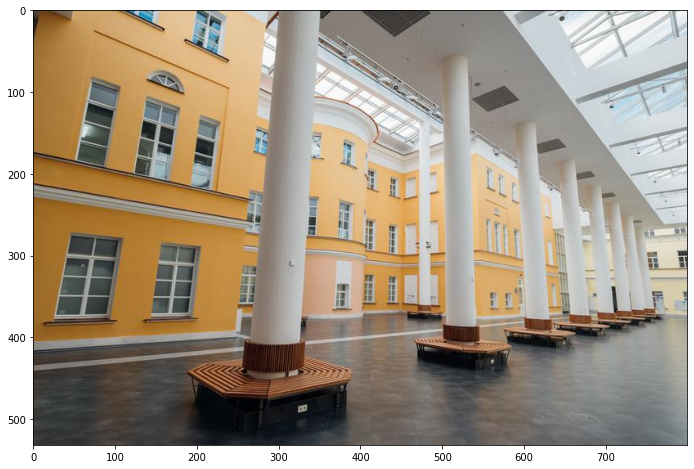

In [34]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./hse.jpeg")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(RGB_img)
plt.show()


In [44]:
import torch
import torch.nn as nn
from torch.nn import functional as F

img_t = torch.from_numpy(RGB_img).type(torch.float32).unsqueeze(0)
kernel = torch.tensor([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
]).reshape(1, 1, 3, 3).type(torch.float32)

                                   #                       out, in, kernel_width, kernel_heigth
kernel = kernel.repeat(3, 3, 1, 1) # result kernel size is [ 3, 3,  3,            3 ]
img_t = img_t.permute(0, 3, 1, 2)  # [BS, H, W, C] -> [BS, C, H, W]
img_t = nn.ReflectionPad2d(1)(img_t)  # Pad Image for same output size

result = F.conv2d(img_t, kernel)[0]  #

In [45]:
result.shape

torch.Size([3, 532, 800])

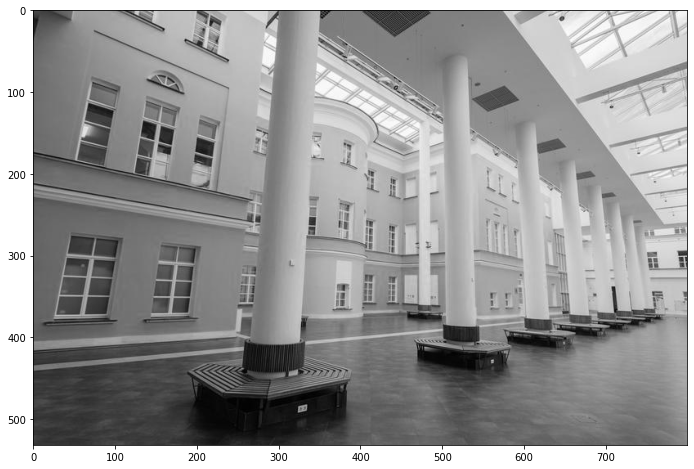

In [36]:
plt.figure(figsize=(12, 8))
result_np = result.permute(1, 2, 0).numpy() / 256 / 3

plt.imshow(result_np[:, :, :])
plt.show()

**Вопрос:** почему изображение потеряло цвет?

Для каждого пикселя каждого слоя наша свертка берет усредненный цвет по всем слоям.

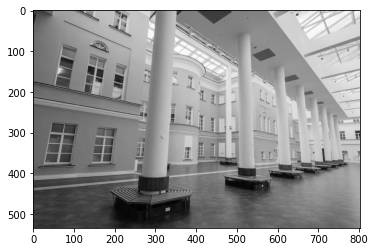

In [46]:
# на самом деле, наша свертка эквивалентна вот такому преобразованию
# усреднение по каналам
plt.imshow(img_t.mean(1).repeat(3, 1, 1).permute(1, 2, 0).numpy() / 255)

# Свертки в pytorch

In [105]:
## копипаста, ничего нового

from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

from torchvision.transforms import ToTensor

from torch.optim import Adam

# ничего нового, копипаста с предыдущего сема
class FMNISTImageSet:
    def __init__(self, train=True, transform=None):
        self.data = FashionMNIST("./tmp", train=train, download=True)

        self.transform = transform
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, item):
        # сделайте одноканальную картинку [1, 28, 28] с float32
        sample, label = self.data[item]

        if self.transform is not None:
            sample = self.transform(sample)
        else:
            sample = np.array(sample, dtype=np.float32)[None:, ...] / 255


        return dict(
            sample=sample,
            label=label,
        )

fmnist_train = FMNISTImageSet(train=True, transform=ToTensor())
fmnist_val = FMNISTImageSet(train=False, transform=ToTensor())

In [106]:
from copy import deepcopy

from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter

from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

from torchvision.transforms import ToTensor

from torch.optim import Adam

class Trainer:
    def __init__(self, model: nn.Module, optimizer,
                 train_dataset: Dataset, val_dataset: Dataset,
                 tboard_log_dir: str = './tboard_logs/', batch_size: int = 128):
        self.model = model
        self.optimizer = optimizer
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset
        self.batch_size = batch_size

        self.device = 'cpu'
        if torch.cuda.is_available():
            self.device = torch.cuda.current_device()
            self.model = self.model.to(self.device)

        self.global_step = 0
        self.log_writer = SummaryWriter(log_dir=tboard_log_dir)


    def save_checkpoint(self, path):
        torch.save(self.model.state_dict(), path)

    def train(self, num_epochs: int):
        model = self.model
        optimizer = self.optimizer

        train_loader = DataLoader(self.train_dataset, shuffle=True, pin_memory=True, batch_size=self.batch_size)
        val_loader = DataLoader(self.val_dataset, shuffle=False, pin_memory=True, batch_size=self.batch_size)
        best_loss = float('inf')

        for epoch in range(num_epochs):
            model.train()
            for batch in tqdm(train_loader):
                batch = {k: v.to(self.device) for k, v in batch.items()}
                loss, details = model.compute_all(batch)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                for k, v in details.items():
                    self.log_writer.add_scalar(k + "/train", v, global_step=self.global_step)
                self.global_step += 1

            with torch.no_grad():
                model.eval()
                val_losses = []
                for batch in tqdm(val_loader):
                    batch = {k: v.to(self.device) for k, v in batch.items()}
                    loss, details = model.compute_all(batch)
                    for k, v in details.items():
                        self.log_writer.add_scalar(k + '/validation', v, global_step=self.global_step)
                    val_losses.append(loss.item())

                val_loss = np.mean(val_losses)

                if val_loss < best_loss:
                    self.save_checkpoint("./best_checkpoint.pth")
                    best_loss = val_loss


## CNNModel

In [107]:
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.inner = nn.Sequential(
            # [ bs, ch, w, h ]
            nn.Conv2d(1, 8, kernel_size=3, padding=1), # [ bs, 8, w, h ]
            nn.ReLU(),
            nn.Conv2d(8, 3, kernel_size=3, padding=1), # [ bs, 3, w, h ]

            nn.Flatten(1), # [ bs, 3 * w * h ]
            nn.Linear(3 * 28 * 28, 10), # [ bs, 10 ]
        )

    def forward(self, x):
        return self.inner(x)
    
    def compute_all(self, batch):  # удобно сделать функцию, в которой вычисляется лосс по пришедшему батчу
        x = batch['sample']
        y = batch['label']
        x = x.unsqueeze(1)
        # print(x.shape)
        logits = self.inner(x) # [ bs, 10 ]
        assert logits.size() == torch.Size([ x.size(0), 10 ]), f"logits size is wrong: {logits.size}"
        
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(axis=1) == y).float().mean().cpu().numpy()
        metrics = dict(acc=acc)
        return loss, metrics

# проверяйте работоспособность сразу
cnn_model = CNNModel()
cnn_opt = optim.SGD(cnn_model.parameters(), lr=1e-2)
cnn_trainset = FMNISTImageSet(train=True)
cnn_valset = FMNISTImageSet(train=False)

cnn_trainer = Trainer(cnn_model, cnn_opt, cnn_trainset, cnn_valset, batch_size=128)

In [108]:
cnn_trainer.train(3)

100%|██████████| 79/79 [00:01<00:00, 61.00it/s]


### Сравнение MLP vs CNN

In [109]:
class VeryModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.inner = nn.Sequential(
            nn.Linear(784, 100),
            nn.ReLU(),
            nn.Linear(100, 10),
        )

    def forward(self, x):
        return self.inner(x)
    
    def compute_all(self, batch):  # удобно сделать функцию, в которой вычисляется лосс по пришедшему батчу
        x = batch['sample']
        y = batch['label']
        logits = self.inner(x)
        
        loss = F.cross_entropy(logits, y)
        acc = (logits.argmax(axis=1) == y).float().mean().cpu().numpy()
        metrics = dict(acc=acc)
        return loss, metrics

model = VeryModel()

In [110]:
sum( p.numel() for p in model.parameters() if p.requires_grad)

79510

In [111]:
sum( p.numel() for p in cnn_model.parameters() if p.requires_grad)

23829

# Pooling, рецептивное поле

## Pooling


> It is common to periodically insert a Pooling layer in-between successive Conv layers in a ConvNet architecture. Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting. 

> https://cs231n.github.io/convolutional-networks/#pool

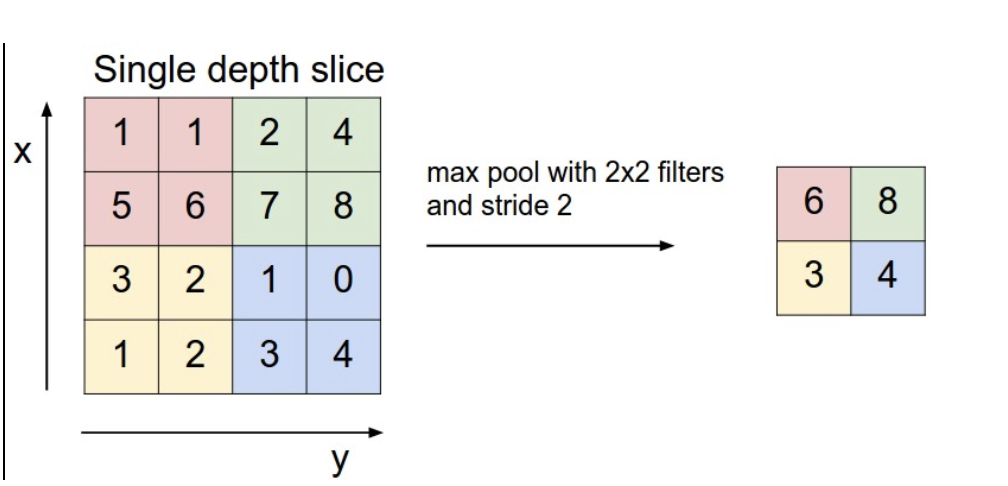

In [55]:
!wget https://i.imgflip.com/658r4d.jpg

--2023-02-06 13:53:26--  https://i.imgflip.com/658r4d.jpg
Resolving i.imgflip.com (i.imgflip.com)... 104.18.64.15, 104.18.255.14
Connecting to i.imgflip.com (i.imgflip.com)|104.18.64.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39502 (39K) [image/jpeg]
Saving to: ‘658r4d.jpg’

658r4d.jpg          100%[===================>]  38.58K  --.-KB/s    in 0.002s  

2023-02-06 13:53:26 (17.7 MB/s) - ‘658r4d.jpg’ saved [39502/39502]



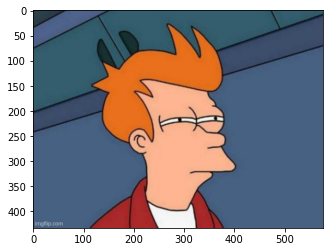

In [56]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("658r4d.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [72]:
maxpool = nn.MaxPool2d(7)
maxpool

MaxPool2d(kernel_size=7, stride=7, padding=0, dilation=1, ceil_mode=False)

**Обучаемые параметры?** Нет

In [112]:
list(maxpool.parameters())

[]

**Попробуем применить пуллинг к картинке**

In [74]:
image_t = torch.tensor(image, dtype=float)
image_t.shape

torch.Size([433, 577, 3])

In [75]:
polled_image_t = maxpool(image_t.unsqueeze(0).transpose(3, 1)).transpose(3, 1)[0, ...]
polled_image_t.shape

torch.Size([61, 82, 3])

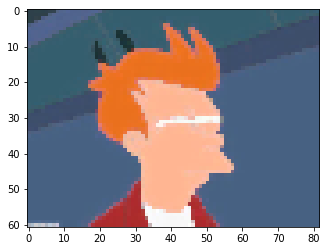

In [76]:
plt.imshow(polled_image_t.numpy().astype(int))

## Global Pooling

[AdaptiveAvgPool2d](https://pytorch.org/docs/master/generated/torch.nn.AdaptiveAvgPool2d.html#torch.nn.AdaptiveAvgPool2d)




In [77]:
# [ bs, 3, 225, 224 ]

# [ bs, 512, 17, 17 ] 
# Linear(512 * 16 * 16, 10)

In [78]:
# [ bs, 512, 17, 17 ]  + flatten(1) = [ bs, 512 * 17 * 17 ]

In [79]:
# AvgPooling
# [ bs, 512, 17, 17 ] ->  [ bs, 512, 1, 1 ] -> [ bs, 512 * 1 * 1 ] 
# Linear(512, 10)

In [80]:
avg_pool = nn.AdaptiveAvgPool2d((1, 1))
avg_pool

AdaptiveAvgPool2d(output_size=(1, 1))

In [81]:
list(avg_pool.parameters())

[]

In [82]:
bs = 3
filters_cnt = 128
dimx = 64
dimy = 64

filters = torch.rand((bs, filters_cnt, dimx, dimy))

avg_pool(filters).shape

torch.Size([3, 128, 1, 1])

## Рецептивное поле

[Источник картинки](https://discuss.pytorch.org/t/dynamic-structure-of-cnn/45870/2)

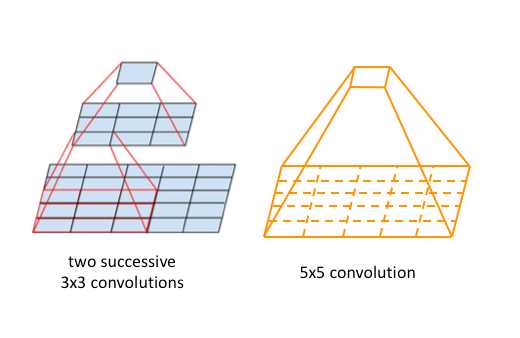

# TorchVision Models


## Residual Block, ResNet

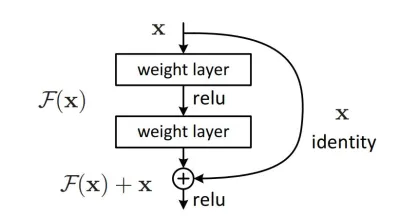

In [84]:
class ResBlock(nn.Module):
    def __init__(self, in_dim, hidden_dim):
        super().__init__()
        """
        in_dim --- размерность слоев на входе (используется в nn.Conv2d)
        hidden_dim --- скрытая размерность слоев (используется в nn.Conv2d)
        """

        self.model = nn.Sequential(
            nn.Linear( 3, 3, kernel_size=3),
            nn.ReLU(),
            nn.Linear( 3, 3, kernel_size=3),
        )

        self.activation = nn.ReLU()

        return

    def forward(self, x):
        
        conved = self.model(x)

        return self.activation(x + conved)


In [ ]:
from torchvision.models import resnet18
import torch.optim as optim
import torch

resnet = resnet18(pretrained=True) # pretrained=True
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## ResNet + Adam/SGD

In [ ]:
!nvidia-smi

Tue Feb 15 02:01:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    32W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
resnet = resnet.to('cuda')

In [ ]:
!nvidia-smi

Tue Feb 15 01:08:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    75W / 149W |    579MiB / 11441MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### Adam

In [ ]:
adam = optim.Adam(resnet.parameters(), lr=3e-4)

out = resnet.forward(torch.rand(1, 3, 224, 224).to('cuda'))
loss = out.mean()
loss.backward()

adam.step()

In [ ]:
!nvidia-smi

Tue Feb 15 01:07:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    75W / 149W |    764MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### SGD

Потребляет меньше видеопамяти, тк не хранит статистики по градиентам


In [ ]:
sgd = optim.SGD(resnet.parameters(), lr=3e-4)

out = resnet.forward(torch.rand(1, 3, 224, 224).to('cuda'))
loss = out.mean()
loss.backward()

sgd.step()

In [ ]:
!nvidia-smi

Tue Feb 15 01:08:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    75W / 149W |    704MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Как применить существующую модель к моей задаче?

**Fine tuning**

In [ ]:
from torchvision.models import resnet18
import torch.nn as nn

resnet = resnet18(pretrained=True)
prev_in_features = resnet.fc.in_features
resnet.fc = nn.Linear(prev_in_features, 10)

In [ ]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Что дальше?

Cтоит постепенно размораживать веса модели. Если начать учить end2end, могут испорититься ядра сверток, так как от нового слоя потекут плохие градиенты, потому что он инициализирован рандомно




In [ ]:
# замораживаем веса для backbone'а сети
for p in resnet.parameters():
    p.requires_grad = False

# размораживаем наш классификатор
for p in resnet.fc.parameters():
    p.requires_grad = True

# for p in resnet.layer4.parameters():
#     p.requires_grad = True
    

In [ ]:
sum(p.numel() for p in resnet.parameters() if p.requires_grad)

5130

# Мега Блиц!

### Зачем нужен параметр `affine` в BatchNorm?

<!-- BN нромализует входной батч. Но может оказаться, что нейросети нужно какое-то смещение или какой-то std. Поэтому в этом слое создаются обучаемые параметры, которые так же вносят вклад в градиент. Чтобы если что, сеть могла выучить необходимое смещение, ско -->


### Зачем нужен `transform=` в классе датасета? Когда его нужно применять?

<!---
    В этот параметр передается функция для предобработки изображения. Эта функция обычно преобразует PIL Image объект (если вы прочитали изображение с помощью cv2) или numpy.array в тензор, нормализует значения пикселей (делит на 255). Самый простой вариант трансформа --- это [ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor)


    Еще с помощью этого метода можно сделать аугментацию изображения: 

    * [Resize](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Resize) --- отмасштабировать изображение
    * [RandomHorizontalFlip](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomHorizontalFlip) --- перевернуть
    * [RandomRotation](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomRotation) --- повернуть

    С помощью аугментаций мы расширяем обучающую выборку при этом не прибегая к ручному сбору данных. Это позволяет обучить более стабильную сеть, часто повысить качество сети.

--->

### Какие основные параметры у свертки? 

<!-- 
Обучаемые параметры
* in/out + kernel_size # одна матрица размерности `[in, out, kernel_size[0], kernel_size[1]]`

Параметры, влияющие на процесс вычисления свертки
* padding
* stride -->


<!-- sum(map(lambda x: x.numel(), nn.Conv2d(3, 3, kernel_size=3).parameters())) -->


### Сколько параметров будет у свертки `nn.Conv2d(3, 3, kernel_size=3)`
<!-- 

nn.Conv2d(3, 3, kernel_size=3)

[3, 3, 3, 3]

kernel_size=3 ~ kernel_size=(3, 3)

```python

вроде 84 (+bias)

``` -->


### Для того, чтобы свертка с ядром 3x3 не изменяла проистранственную размерность изображения при `stride=1`, мы используем `padding=1`. Какое значение `padding` нужно использвать для ядра 5x5 и `stride=1`?

<!-- `padding=2` -->

### Как вы думаете, какие ядра выучивают реальные нейросетки на настоящих картинках?

<!-- Вообще говоря, принято считать, что фильтры выучиват текстуры. И используя это можно обмануть нейросеетвой классификатор, например, если показать ему рыбу с текстурой чешуи как кожа коровы, то классификатор, скорее всего будет считать это коровой.

Сами ядра можно визуализировать

https://deeplizard.com/learn/video/cNBBNAxC8l4

<img src="https://deeplizard.com/assets/jpg/c50ac9ac.jpg"> -->

### В начале сема есть 6 сверток, пронумерованные буквами. Сопоставьте ядра действию, которое делает это ядро:

1) Размытие

2) Увеличение резкости

3) Тождественное преобразование

4) Выделение вертикальных границ

5) Выделение горизонтальных границ

6) Выделение границ
<!-- 
```
A 3
Б 4
В 5
Г 6
Д 1
Е 2
``` -->

### Какой размерности свертка и какие у нее параметры в cs231?

гифку https://cs231n.github.io/convolutional-networks/

> The visualization below iterates over the output activations (green), and shows that each element is computed by elementwise multiplying the highlighted input (blue) with the filter (red), summing it up, and then offsetting the result by the bias

```
Conv2d(?, ?, kernel_size=?, padding=?, stride?)
```

<!-- Conv2d(3, 2, kernel_size=3, padding=1, stride=2) -->


## После применения свертки к изображению мы получили 10 фильтров. За счет чего мы получаем разные значения в этих фильрах?


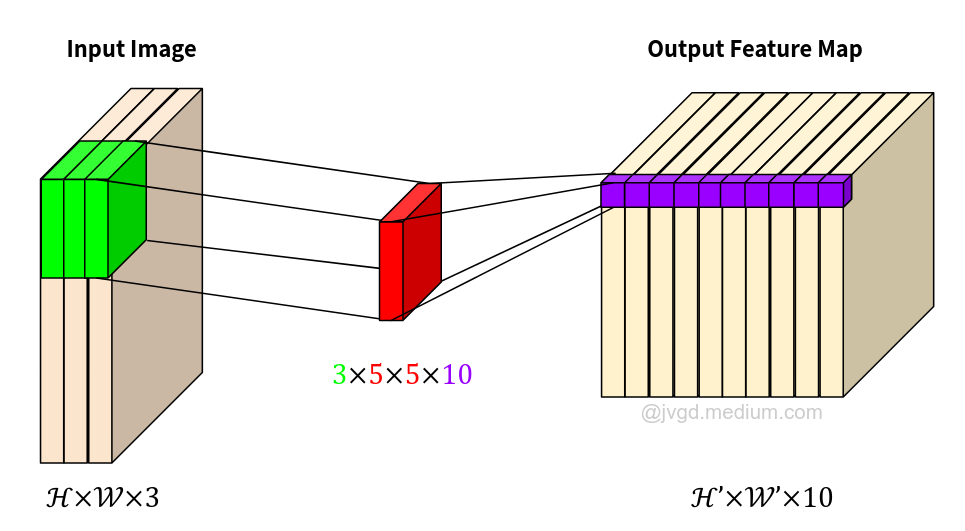


## Какое рецептивное поле у одной ячейки выходного тензора сверточной сети, состоящеи из двух подряд идущих сверток 3x3, (`stride=1`)?

```
nn.Sequential(
    nn.Conv2d(in, out_1,    kernel_size=3),
    # ...
    nn.Conv2d(out_1, out_2, kernel_size=3),
)
```

Другими словами: какое количество пикселей вложили свои значения в один "пиксель" итогового фильтра (feature-map'ки это одно и то же)?


<!--
    Ответ 5*5=25 . Рецептивное поле одного пикселя первого фильтра 3x3. 
    Если взять квадратик 3x3 этого фильтра, то это будет соответствовать как раз одному "пикселю" второго фильтра. И квадратику 5x5 исходного изображения
-->

## Чем Pooling отличается от Global Pooling?

<!-- 

Global Polling действует по всей пространственной размерности картинки. Обычно выходом Global Polling является тензор [ bs, channels, 1, 1 ]

Polling же просто уменьшает пространственную размерность изображения/предыдущего фильтра. Это позволяет увеличить рецептивное поле последующих нейронов

-->

## Зачем мы хотим увеличить рецептивное поле на более глубоких слоях?

<!-- 

Если решаем задачу классфикации, то последним слоем идет Linear. Этот слой применяется к последней фича-мапе. 

Linear ничего не умеет знать про структуру картинки, но никак не учитывает расположение пикселей, их "соседство". Но сами значениях последнего фильтра могут содержать такую информацию и потенциально чем больше рецептивное поле, тем больше информации мы можем сохранить в последнем фильтре

-->

## Почему при использовании Adam может потребоваться большее количество видеопамяти для обучения модели?


<!--
Тк Adam для каждого папраметра хранит по 2 статистики (скользящии средние по градиентам и по квадратам градиента). Эти данные тоже хранятся в видеопамяти
-->

# Обзор новой домашки!

###  Заполните, пожалуйста, фидбэк по первой домашке
